# About this Dataset:
### Credit Card Transactions
*   **index** - Unique Identifier for each row
*   **trans_date_trans_time** - Transaction DateTime
*   **cc_num** - Credit Card Number of Customer
*   **merchant** - Merchant Name
*   **category** - Category of Merchant
*   **amt** - Amount of Transaction
*   **first** - First Name of Credit Card Holder
*   **last** - Last Name of Credit Card Holder
*   **gender** - Gender of Credit Card Holder
*   **street** - Street Address of Credit Card Holder
*   **city** - City of Credit Card Holder
*   **state** - State of Credit Card Holder
*   **zip** - Zip of Credit Card Holder
*   **lat** - Latitude Location of Credit Card Holder
*   **long** - Longitude Location of Credit Card Holder
*   **city_pop** - Credit Card Holder's City Population
*   **job** - Job of Credit Card Holder
*   **dob** - Date of Birth of Credit Card Holder
*   **trans_num** - Transaction Number
*   **unix_time** - UNIX Time of transaction
*   **merch_lat** - Latitude Location of Merchant
*   **merch_long** - Longitude Location of Merchant
*   **is_fraud** - Fraud Flag <--- Target Class

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from imblearn.over_sampling import SMOTE

In [2]:
# Load data
# df_train = pd.read_csv('fraudTrain.csv')
# df_test = pd.read_csv('fraudTest.csv')

# print("Train dataset shape:", df_train.shape)
# print("Test dataset shape:", df_test.shape)

In [3]:
# df_train.head()

In [4]:
# df_test.head()

In [5]:
# Merging the dataset to preprocess the data
# fraud_data = pd.concat([df_train, df_test], ignore_index=True)
fraud_data = pd.read_csv('creditCardFraudData.csv')

In [6]:
# Checking the shape of the merged dataset
fraud_data.shape

(1852394, 23)

In [7]:
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
fraud_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852389,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [9]:
# Unnamed: 0 is an extra column which contains the indexs, so removing the unnamed: 0 column form the dataset
fraud_data.drop('Unnamed: 0', axis=1, inplace=True)

According to the dataset description, the folowing fields are user related information and does not have any relation with the fraud transaction or not.

cc_num, merchant, first, last, job and trans_num  (an unique Number).

street, city, state, zip, these can be replaced by lat and long

From trans_data_trans_time we can extract the month, weekday and hour which is a common information for the future predictions.
We can also drop the unix_time since we extracted the month, weekday and hour of transactions.

the dob will be converted into age fields and then we can drop dob

So, We can eliminate these attributes from our feature list


In [10]:
fraud_data.drop(['unix_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'trans_num',], axis=1, inplace=True)

In [11]:
fraud_data.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,misc_net,4.97,F,36.0788,-81.1781,3495,1988-03-09,36.011293,-82.048315,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0
2,2019-01-01 00:00:51,entertainment,220.11,M,42.1808,-112.2620,4154,1962-01-19,43.150704,-112.154481,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,46.2306,-112.1138,1939,1967-01-12,47.034331,-112.561071,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,38.4207,-79.4629,99,1986-03-28,38.674999,-78.632459,0


In [12]:
# Checking the Null values in the Dataset
fraud_data.isnull().sum()

trans_date_trans_time    0
category                 0
amt                      0
gender                   0
lat                      0
long                     0
city_pop                 0
dob                      0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
fraud_data.dtypes

trans_date_trans_time     object
category                  object
amt                      float64
gender                    object
lat                      float64
long                     float64
city_pop                   int64
dob                       object
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [14]:
# Checking for categories in the attributes
for col in fraud_data.columns:
    if fraud_data[col].dtype == 'object':
        print(f"Unique samples in the {col} are \n{len(fraud_data[col].unique())}")

Unique samples in the trans_date_trans_time are 
1819551
Unique samples in the category are 
14
Unique samples in the gender are 
2
Unique samples in the dob are 
984


In [15]:
import datetime

def calculate_age(dob):
    """Calculates the age based on the date of birth."""
    today = datetime.date.today()
    return today.year - dob.year

In [16]:
# Converting the DoB to Age
fraud_data.dob = pd.to_datetime(fraud_data.dob)
fraud_data['age'] = fraud_data.dob.apply(calculate_age)
fraud_data.drop('dob', axis=1, inplace=True)
fraud_data.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,36
1,2019-01-01 00:00:44,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,46
2,2019-01-01 00:00:51,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,62
3,2019-01-01 00:01:16,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,57
4,2019-01-01 00:03:06,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,38


In [17]:
print(min(fraud_data.age), max(fraud_data.age))

19 100


In [18]:
# Creating a group of ages
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
fraud_data['age_group'] = pd.cut(fraud_data.age, bins=bins, labels=labels)
fraud_data.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,age_group
0,2019-01-01 00:00:18,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,36,31-40
1,2019-01-01 00:00:44,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,46,41-50
2,2019-01-01 00:00:51,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,62,61-70
3,2019-01-01 00:01:16,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,57,51-60
4,2019-01-01 00:03:06,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,38,31-40


In [19]:
# Extracting the Feature of Month, weekday, Hours from the Transaction Date Transation Time
fraud_data['month'] = pd.to_datetime(fraud_data.trans_date_trans_time).dt.month
fraud_data['weekday'] = pd.to_datetime(fraud_data.trans_date_trans_time).dt.weekday
fraud_data['hour'] = pd.to_datetime(fraud_data.trans_date_trans_time).dt.hour
fraud_data.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,age_group,month,weekday,hour
0,2019-01-01 00:00:18,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,36,31-40,1,1,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,46,41-50,1,1,0
2,2019-01-01 00:00:51,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,62,61-70,1,1,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,57,51-60,1,1,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,38,31-40,1,1,0


In [20]:
# Considering only the Fraud samples
fraud_data_fraud = fraud_data[fraud_data['is_fraud'] == 1]

In [21]:
# Check is the category has any relation with the fraud transaction are not
def counter_plot(y_var, hue_var='is_fraud', dataset=fraud_data, color=None):
    fig = plt.figure(figsize=(10,8))

    # Create count plot with region on the y-axis
    plot = sns.countplot(y = y_var,
                      data=dataset,
                      hue=hue_var,
                      order=fraud_data[y_var].value_counts().sort_index(ascending=False).index,
                      palette=color
                      )

    # Set title, label, legend
    plot.set_title(f'Transaction {y_var} vs {hue_var} count')
    plot.set_xlabel(f'{hue_var} count')
    plot.set_ylabel(f'{y_var}')

    plt.show()

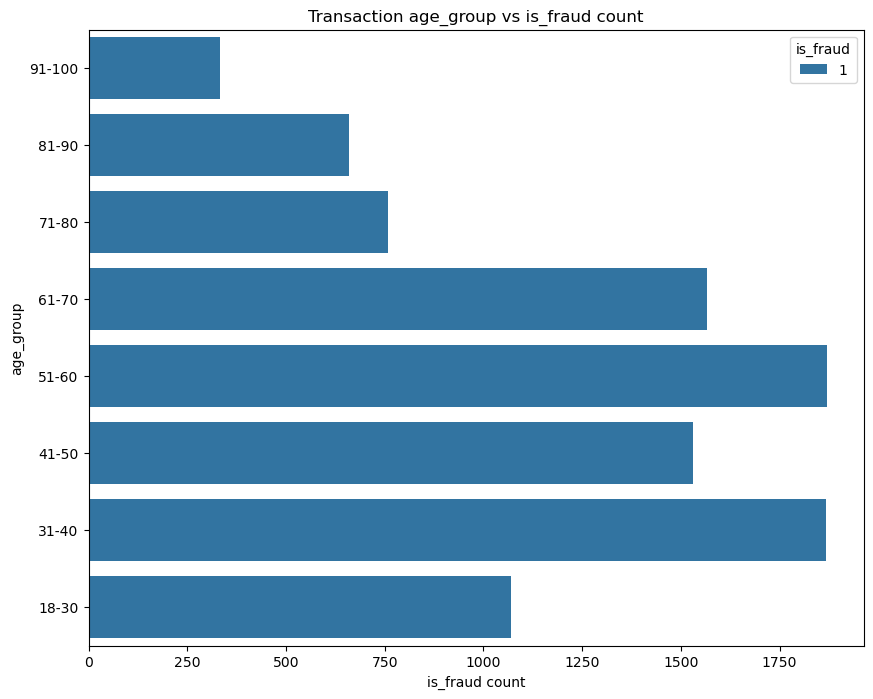

In [22]:
counter_plot('age_group', 'is_fraud', fraud_data_fraud)

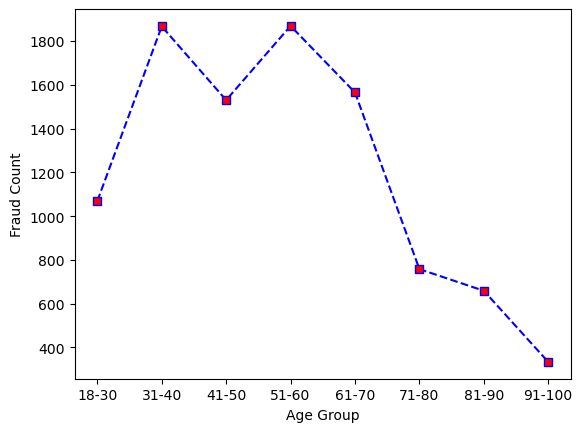

In [23]:
# Lets visualise it with the line plot
fraud_data_fraud.groupby('age_group').size().plot(
                                              kind='line',
                                              xlabel='Age Group',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

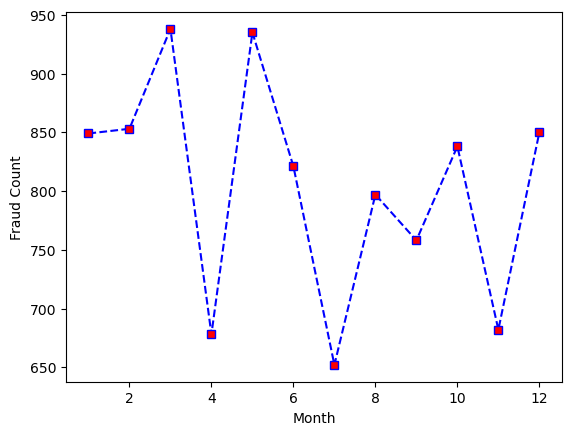

In [24]:
# Lets visualise it with the line plot
fraud_data_fraud.groupby('month').size().plot(
                                              kind='line',
                                              xlabel='Month',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

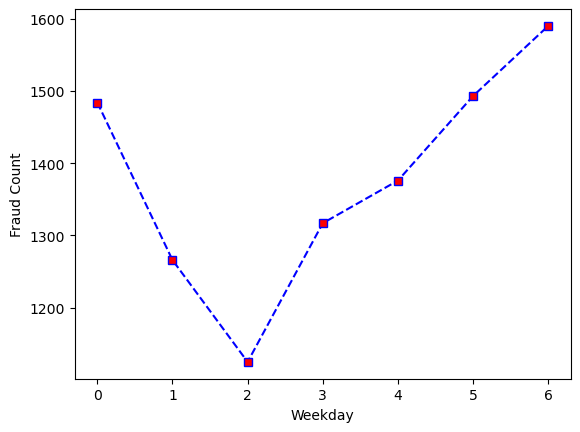

In [25]:
# Lets visualise it with the line plot
fraud_data_fraud.groupby('weekday').size().plot(
                                              kind='line',
                                              xlabel='Weekday',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

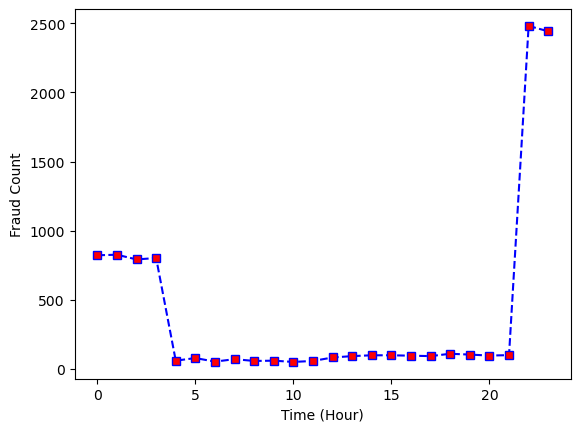

In [26]:
# Lets visualise it with the line plot
fraud_data_fraud.groupby('hour').size().plot(
                                              kind='line',
                                              xlabel='Time (Hour)',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

We can observe that there are more fraud transaction happen with the following categories 'shopping_net', 'grocery_pos', 'shopping_pos', 'misc_net' and 'gas_transport'.

Lets consider only the fraud data and check what categories have the more fraud

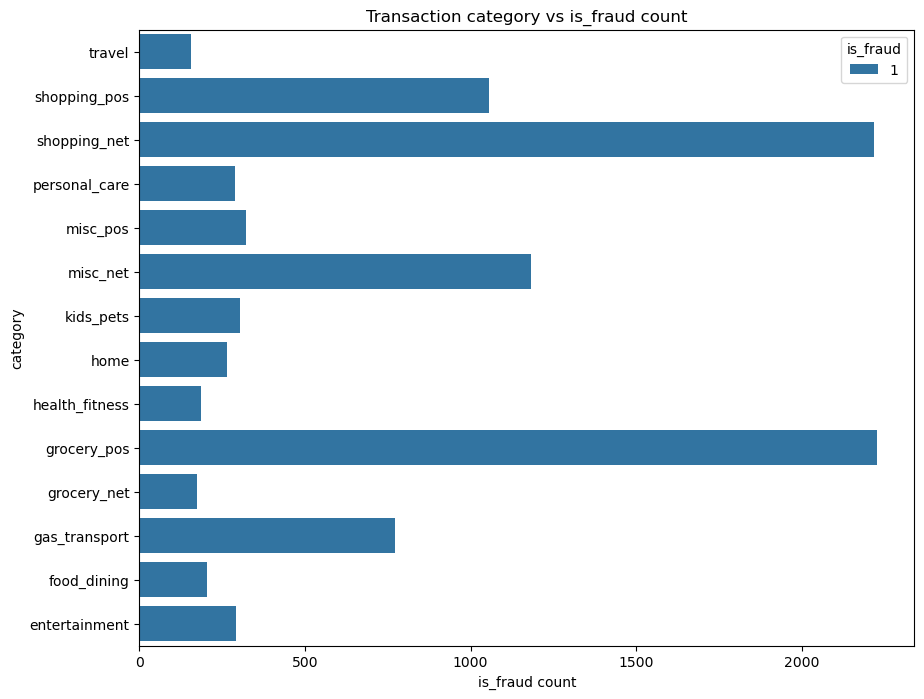

In [27]:
# Over all Fraud Data in each category
counter_plot('category', 'is_fraud', fraud_data_fraud)

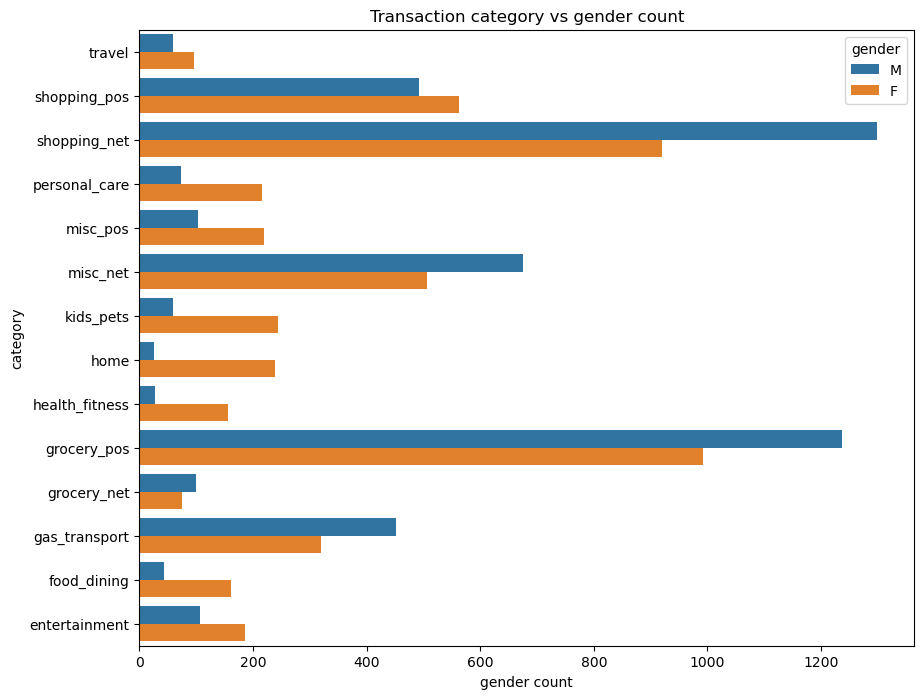

In [28]:
# Checking the categories of fraud for each male and female
counter_plot('category', 'gender', fraud_data_fraud)

We can observe there are frauds data for each category.

the male customers are having the more fraud transaction compared to the female.

We can see that the categories "shopping_net", "grocery_pos", "shopping_pos", "misc_net" and "gas_transport" have the highest number of fraudulent transactions.

This suggests that these categories may be helpful in identifying fraudulent transactions.

We should convert the Categorical to the Numerical value for the Category field
We can perform one-hot encoding technique or divide the categories into high risk probability, medium risk and low risk probability categories


In [29]:
# if category count is above 50% of max fraud count category then make it high
# if category count is arounf 10-60% of max fraud count then make it medium
# if less than 10 % make it low

fraud_data_fraud_count = fraud_data_fraud['category'].value_counts()
fraud_total_count = max(fraud_data_fraud_count)
high_risk_categories = []
medium_risk_categories = []
low_risk_categories = []

for category, count in fraud_data_fraud_count.items():
  fraud_percentage = count / fraud_total_count
  if fraud_percentage > 0.5:
    high_risk_categories.append(category)
  elif fraud_percentage > 0.1:
    medium_risk_categories.append(category)
  else:
    low_risk_categories.append(category)
print(f"High Risk Categories : {high_risk_categories}")
print(f"Medium Risk Categories : {medium_risk_categories}")
print(f"Low Risk Categories : {low_risk_categories}")
fraud_data['category_risk'] = fraud_data['category'].apply(lambda x: '3' if x in high_risk_categories else '2' if x in medium_risk_categories else '1')

High Risk Categories : ['grocery_pos', 'shopping_net', 'misc_net']
Medium Risk Categories : ['shopping_pos', 'gas_transport', 'misc_pos', 'kids_pets', 'entertainment', 'personal_care', 'home']
Low Risk Categories : ['food_dining', 'health_fitness', 'grocery_net', 'travel']


In [30]:
fraud_data.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,age_group,month,weekday,hour,category_risk
0,2019-01-01 00:00:18,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,36,31-40,1,1,0,3
1,2019-01-01 00:00:44,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,46,41-50,1,1,0,3
2,2019-01-01 00:00:51,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,62,61-70,1,1,0,2
3,2019-01-01 00:01:16,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,57,51-60,1,1,0,2
4,2019-01-01 00:03:06,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,38,31-40,1,1,0,2


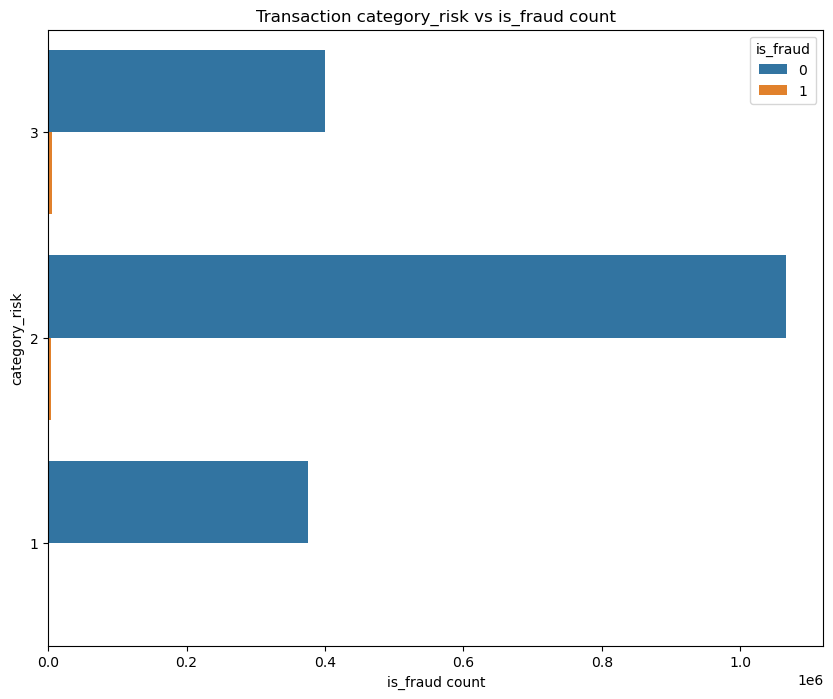

In [31]:
counter_plot('category_risk', 'is_fraud')

In [32]:
fraud_data.gender.unique()

array(['F', 'M'], dtype=object)

In [33]:
# converting the gender to the int field
fraud_data.gender = fraud_data.gender.replace({'M': 0, 'F': 1})
fraud_data.head()

,trans_date_trans_time,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,age_group,month,weekday,hour,category_risk
0,2019-01-01 00:00:18,misc_net,4.97,1,36.0788,-81.1781,3495,36.011293,-82.048315,0,36,31-40,1,1,0,3
1,2019-01-01 00:00:44,grocery_pos,107.23,1,48.8878,-118.2105,149,49.159047,-118.186462,0,46,41-50,1,1,0,3
2,2019-01-01 00:00:51,entertainment,220.11,0,42.1808,-112.2620,4154,43.150704,-112.154481,0,62,61-70,1,1,0,2
3,2019-01-01 00:01:16,gas_transport,45.00,0,46.2306,-112.1138,1939,47.034331,-112.561071,0,57,51-60,1,1,0,2
4,2019-01-01 00:03:06,misc_pos,41.96,0,38.4207,-79.4629,99,38.674999,-78.632459,0,38,31-40,1,1,0,2


In [34]:
# Dropping the Category field from the preproccessed dataset and ave the preproccessed dataset
fraud_data_pp = fraud_data.drop(['category', 'trans_date_trans_time', 'age_group'], axis=1)
fraud_data_pp.head()

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,month,weekday,hour,category_risk
0,4.97,1,36.0788,-81.1781,3495,36.011293,-82.048315,0,36,1,1,0,3
1,107.23,1,48.8878,-118.2105,149,49.159047,-118.186462,0,46,1,1,0,3
2,220.11,0,42.1808,-112.2620,4154,43.150704,-112.154481,0,62,1,1,0,2
3,45.00,0,46.2306,-112.1138,1939,47.034331,-112.561071,0,57,1,1,0,2
4,41.96,0,38.4207,-79.4629,99,38.674999,-78.632459,0,38,1,1,0,2


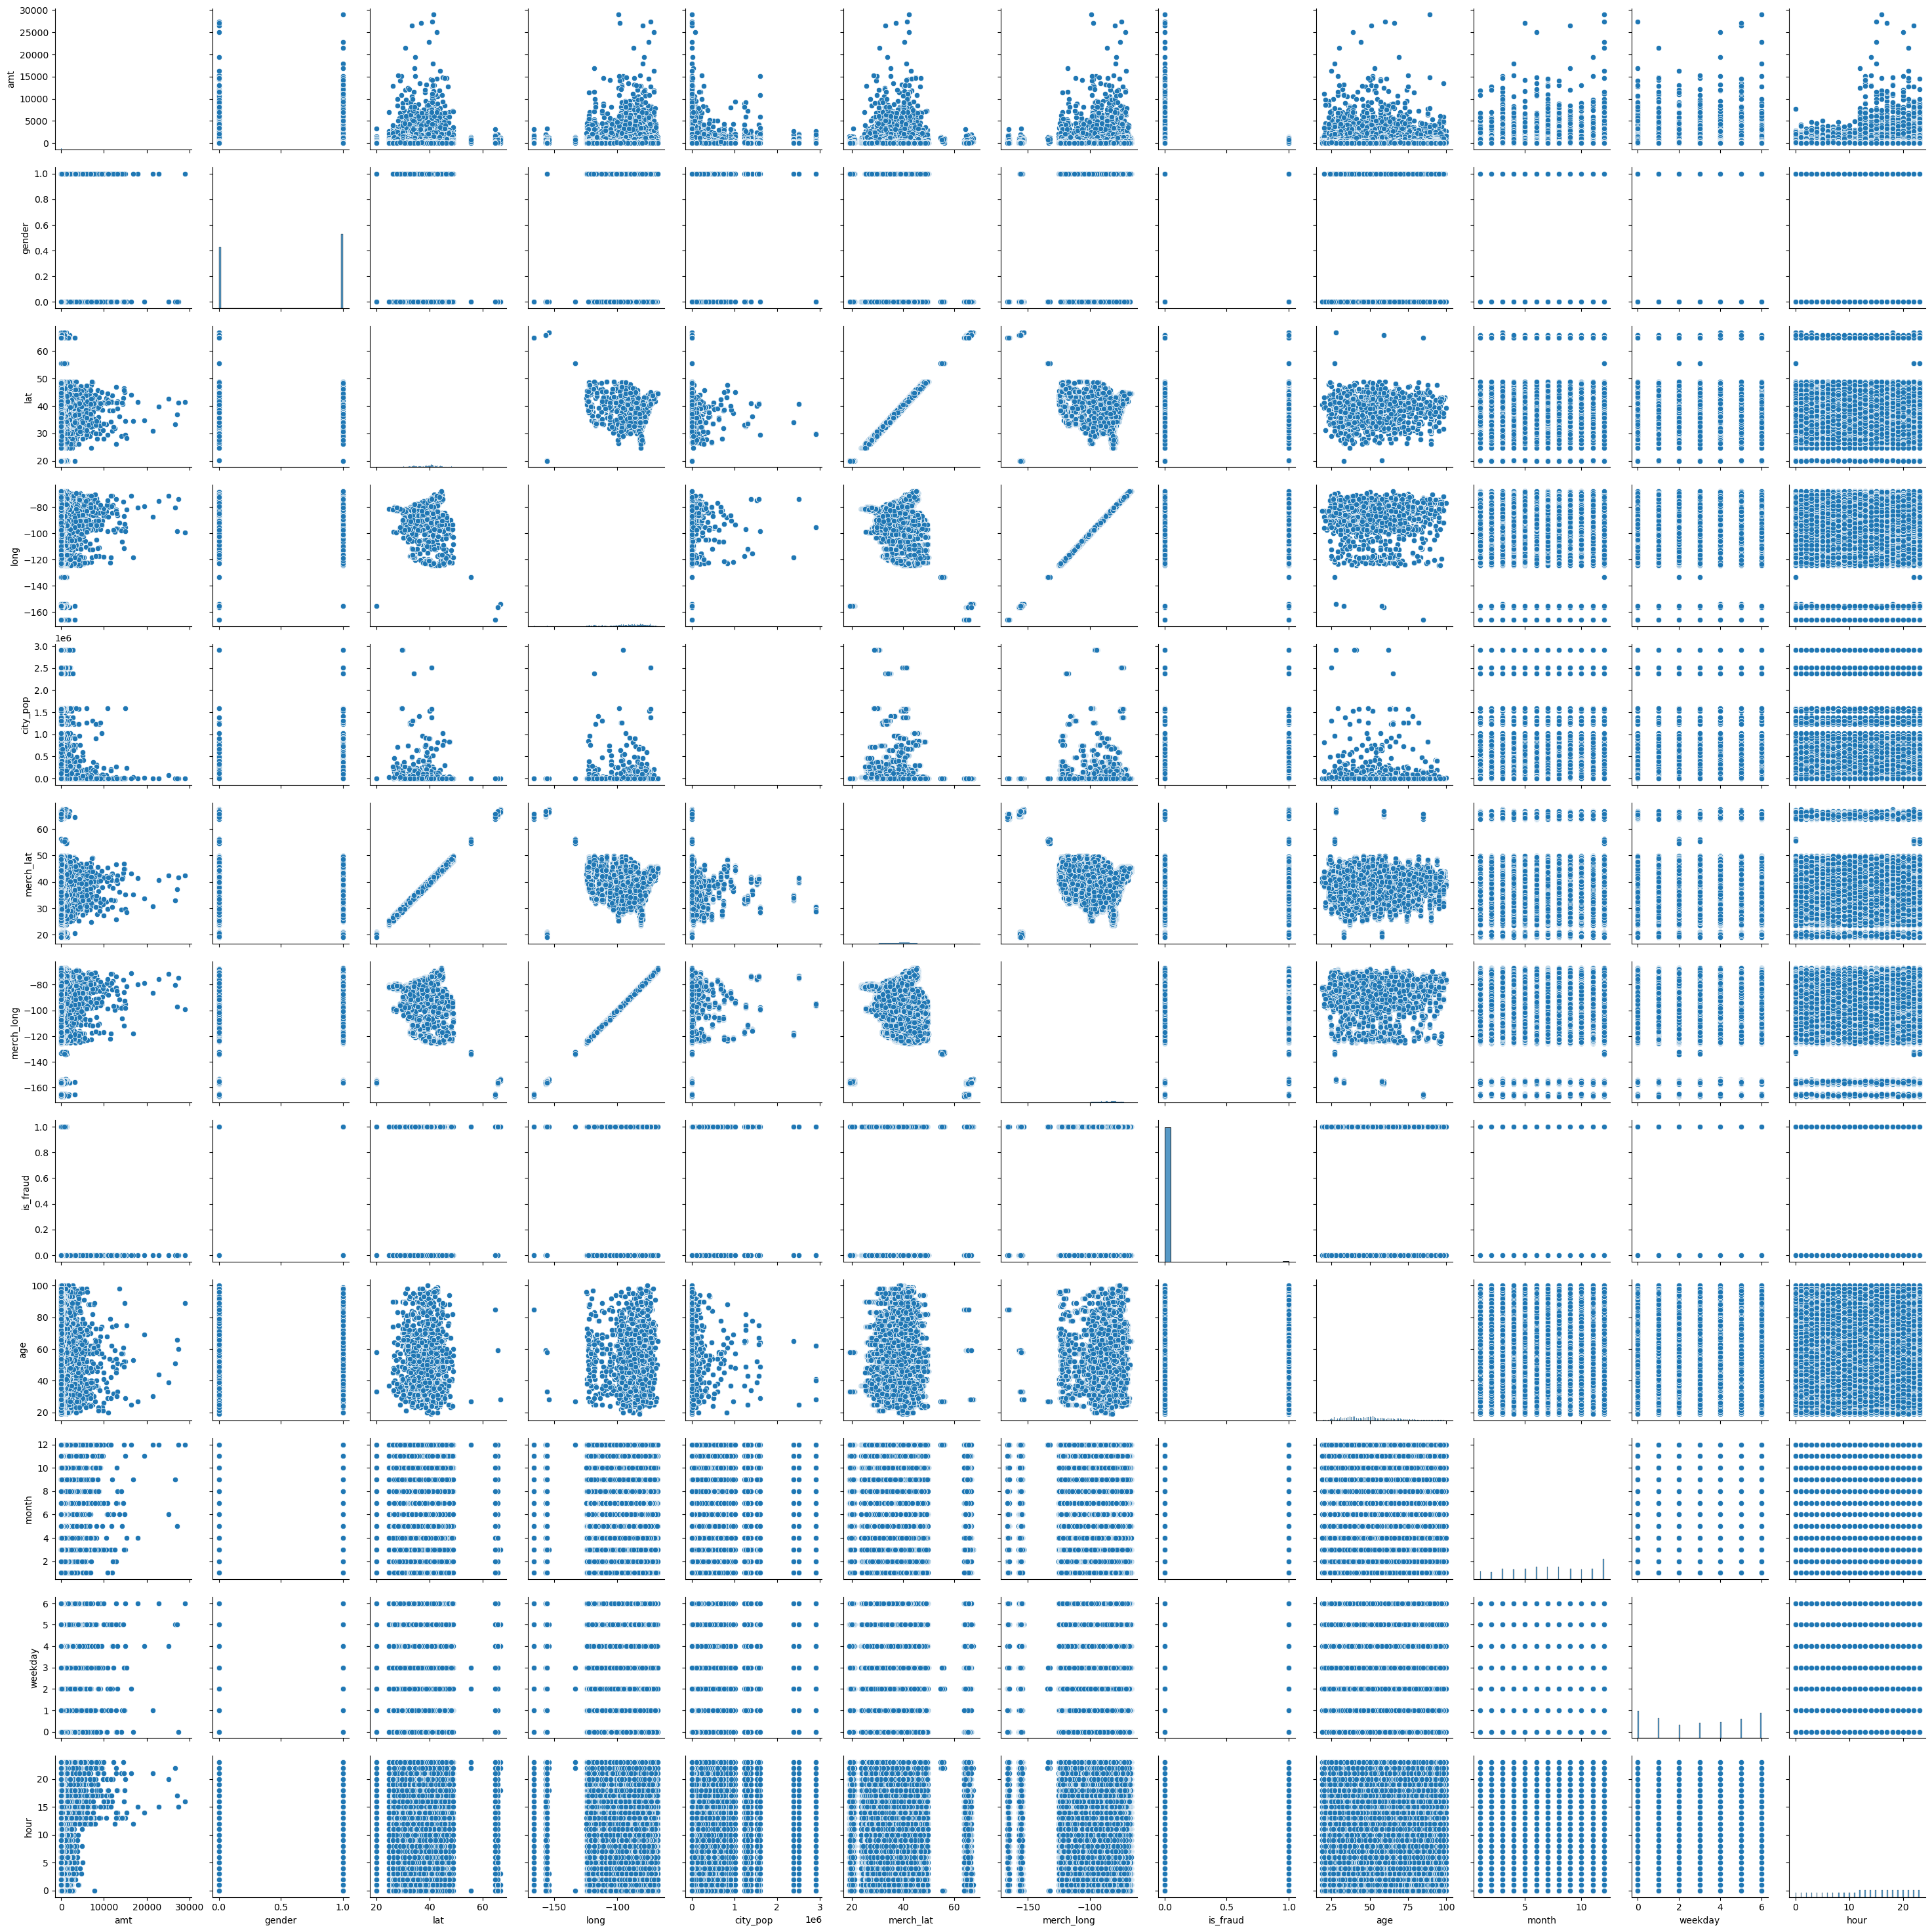

In [35]:
# Loop through each feature and plot pairplot with target
sns.pairplot(fraud_data_pp)
plt.show()


If we observe there is a linear relation between the lat, merch_lat and long and merch_long

this may be because of the both the customer and merchant are at same location.

Here we can check the distance between them as a feature.

lets find the distance between the credit card holder and merchant location.


In [35]:
def distance_between_customer_merch(data):
  """Calculates the distance between two points"""
  dis_long = data.merch_long - data.long
  dis_lat = data.merch_lat - data.lat
  distance = np.sqrt(dis_long**2 + dis_lat**2)
  return distance

fraud_data_pp['distance'] = distance_between_customer_merch(fraud_data_pp)
fraud_data_pp.head()

,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,age,month,weekday,hour,category_risk,distance
0,4.97,1,36.0788,-81.1781,3495,36.011293,-82.048315,0,36,1,1,0,3,0.872830
1,107.23,1,48.8878,-118.2105,149,49.159047,-118.186462,0,46,1,1,0,3,0.272310
2,220.11,0,42.1808,-112.2620,4154,43.150704,-112.154481,0,62,1,1,0,2,0.975845
3,45.00,0,46.2306,-112.1138,1939,47.034331,-112.561071,0,57,1,1,0,2,0.919802
4,41.96,0,38.4207,-79.4629,99,38.674999,-78.632459,0,38,1,1,0,2,0.868505


In [36]:
fraud_data_fraud = fraud_data_pp[fraud_data_pp['is_fraud'] == 1]

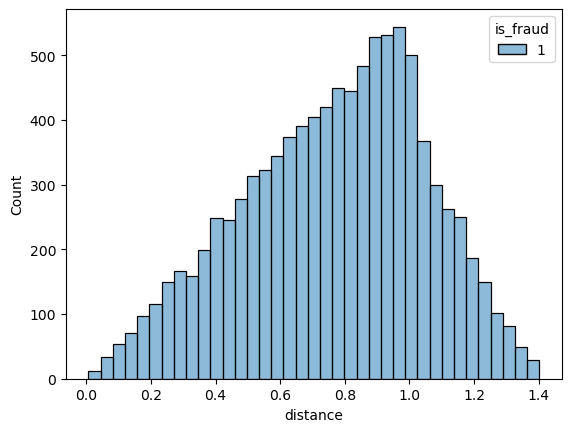

In [37]:

sns.histplot(data=fraud_data_fraud, x="distance", hue="is_fraud")
plt.show()


As we can observe as the distnace increases the fraud is increases after certain distance the fraud transactions are droped so quickly.

The distance feature doesnt helps much for detetcting the fraud because there is no linear relation.

The lat and long suggested the location of the place where might be the fraud happends. I depends on which location more fraud tarnsactions happen lets check is there any relation


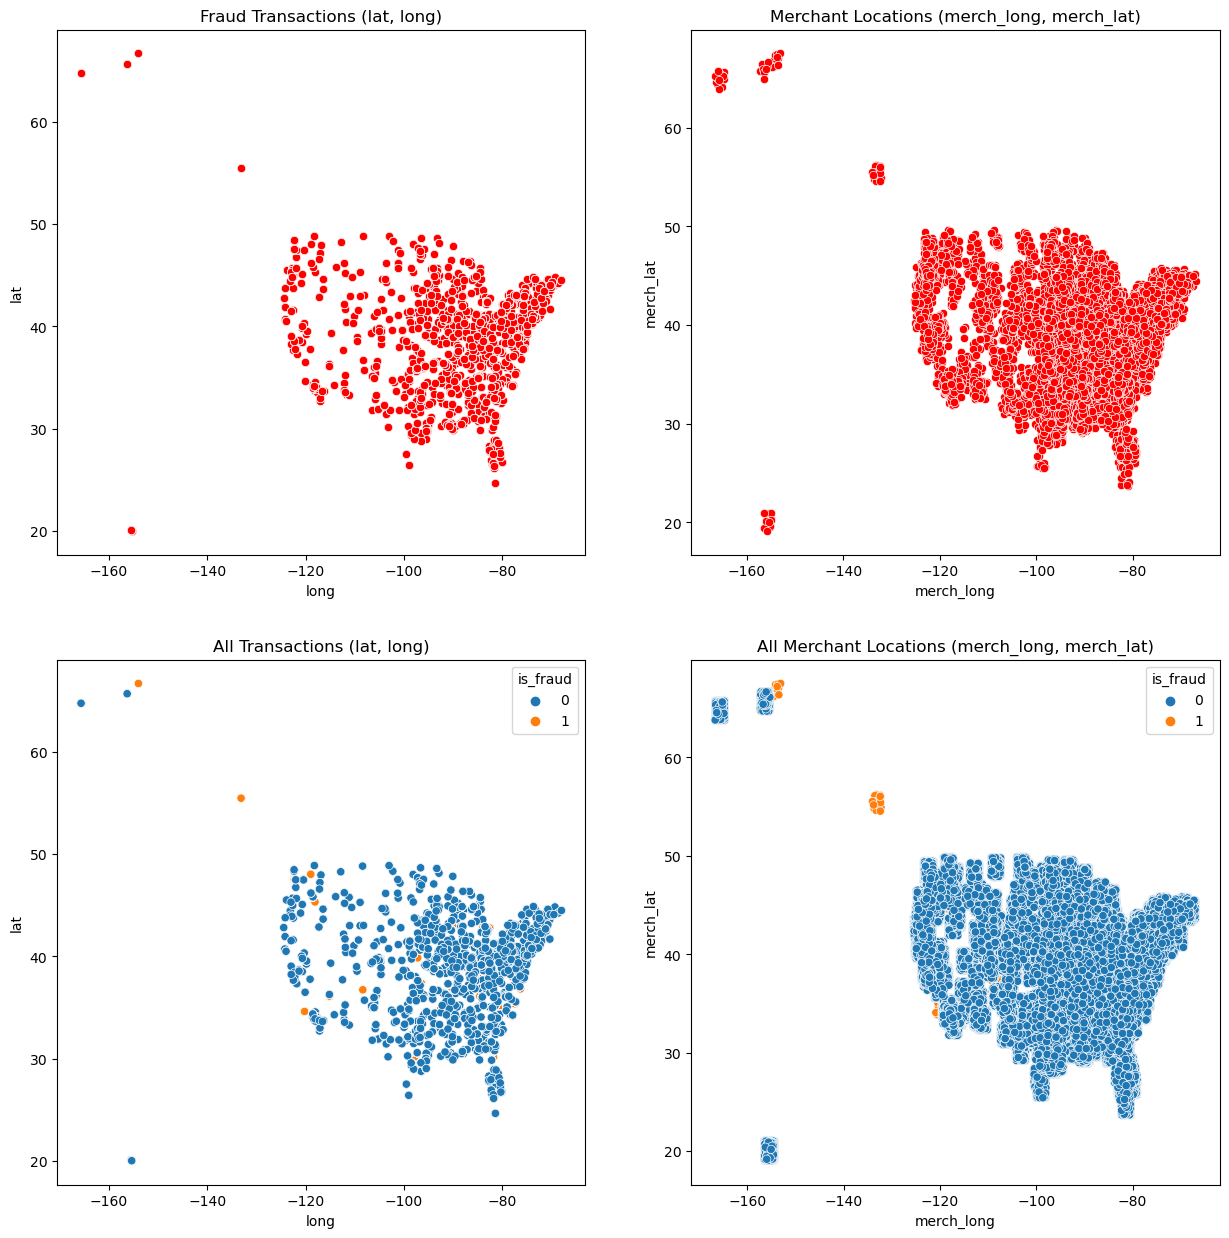

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1: Fraud transactions (lat, long)
sns.scatterplot(x="long", y="lat", data=fraud_data_fraud, color="red", ax=axes[0, 0])
axes[0, 0].set_title("Fraud Transactions (lat, long)")

# Plot 2: Merchant locations (merch_long, merch_lat)
sns.scatterplot(x="merch_long", y="merch_lat", data=fraud_data_fraud, color="red", ax=axes[0, 1])
axes[0, 1].set_title("Merchant Locations (merch_long, merch_lat)")

# Plot 3: All transactions (lat, long)
sns.scatterplot(x="long", y="lat", data=fraud_data_pp, hue="is_fraud", ax=axes[1, 0])
axes[1, 0].set_title("All Transactions (lat, long)")

# Plot 4: All merchant locations (merch_long, merch_lat)
sns.scatterplot(x="merch_long", y="merch_lat", data=fraud_data_pp, hue="is_fraud", ax=axes[1, 1])
axes[1, 1].set_title("All Merchant Locations (merch_long, merch_lat)")

plt.show()


If we observe at certain location all the transactions are fraud transactions. So we can consider only the merchant latitudes and longitudes since they accumulate the customer lat and long.

In [38]:
fraud_data_pp.drop(['lat', 'long', 'distance'], axis=1, inplace=True)
fraud_data_pp.head()

,amt,gender,city_pop,merch_lat,merch_long,is_fraud,age,month,weekday,hour,category_risk
0,4.97,1,3495,36.011293,-82.048315,0,36,1,1,0,3
1,107.23,1,149,49.159047,-118.186462,0,46,1,1,0,3
2,220.11,0,4154,43.150704,-112.154481,0,62,1,1,0,2
3,45.00,0,1939,47.034331,-112.561071,0,57,1,1,0,2
4,41.96,0,99,38.674999,-78.632459,0,38,1,1,0,2


In [39]:
fraud_data_pp.dtypes

amt              float64
gender             int64
city_pop           int64
merch_lat        float64
merch_long       float64
is_fraud           int64
age                int64
month              int64
weekday            int64
hour               int64
category_risk     object
dtype: object

In [40]:
fraud_data_pp.category_risk = fraud_data_pp.category_risk.astype('int64')
fraud_data_pp.dtypes

amt              float64
gender             int64
city_pop           int64
merch_lat        float64
merch_long       float64
is_fraud           int64
age                int64
month              int64
weekday            int64
hour               int64
category_risk      int64
dtype: object

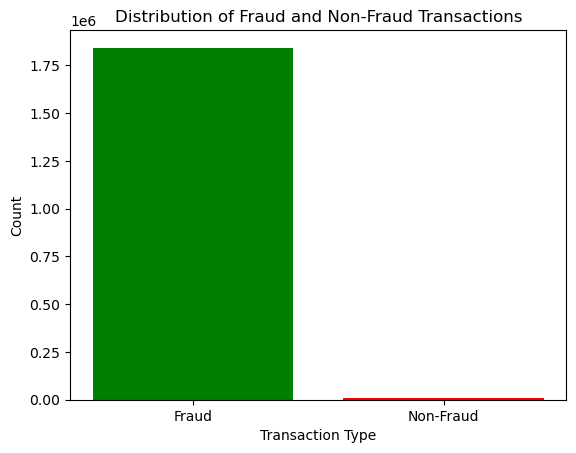

In [41]:
# Checking is data is balanced or not 

plt.bar(['Fraud', 'Non-Fraud'], fraud_data_pp['is_fraud'].value_counts(), color=['green', 'red'])

plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

plt.show()

We can clearly say that the data is imbalanced, Lets perform oversampling to the dataset

In [42]:
# saving the fraud_data_pp
# fraud_data_pp.to_csv('creditCardFraudPreProccessed.csv', index=False)

In [43]:
# Over sampling the Data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(fraud_data_pp.drop('is_fraud', axis=1), fraud_data_pp['is_fraud'])

# Save the oversampled data to a CSV file
oversampled_data = pd.concat([pd.DataFrame(X_resampled), y_resampled], axis=1)

# oversampled_data.to_csv('creditCardFraudData_oversampled.csv', index=False)

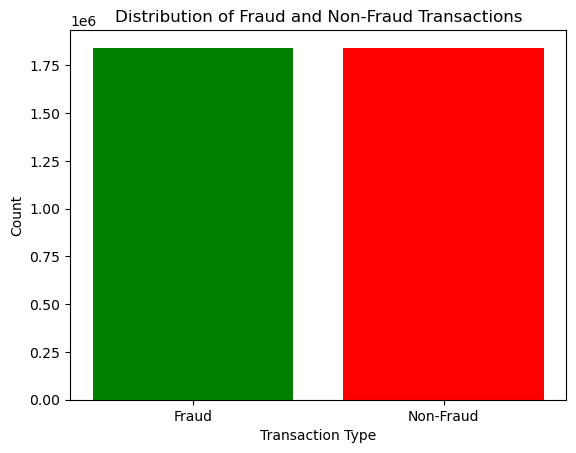

In [44]:
plt.bar(['Fraud', 'Non-Fraud'], oversampled_data['is_fraud'].value_counts(), color=['green', 'red'])

plt.title('Distribution of Fraud and Non-Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

plt.show()

In [45]:
# Creating a group of ages
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
oversampled_data['age_group'] = pd.cut(oversampled_data.age, bins=bins, labels=labels)
oversampled_data.head()

,amt,gender,city_pop,merch_lat,merch_long,age,month,weekday,hour,category_risk,is_fraud,age_group
0,4.97,1,3495,36.011293,-82.048315,36,1,1,0,3,0,31-40
1,107.23,1,149,49.159047,-118.186462,46,1,1,0,3,0,41-50
2,220.11,0,4154,43.150704,-112.154481,62,1,1,0,2,0,61-70
3,45.00,0,1939,47.034331,-112.561071,57,1,1,0,2,0,51-60
4,41.96,0,99,38.674999,-78.632459,38,1,1,0,2,0,31-40


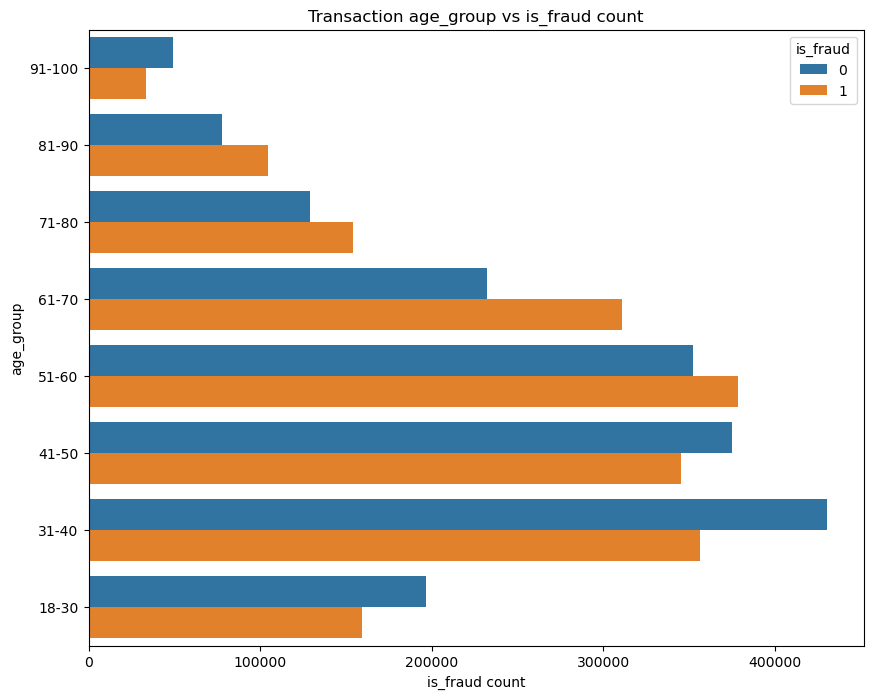

In [46]:
counter_plot('age_group', 'is_fraud', oversampled_data)

In [47]:
fraud_data_oversampled = oversampled_data[oversampled_data['is_fraud'] == 1]
non_fraud_data_oversampled = oversampled_data[oversampled_data['is_fraud'] == 0]

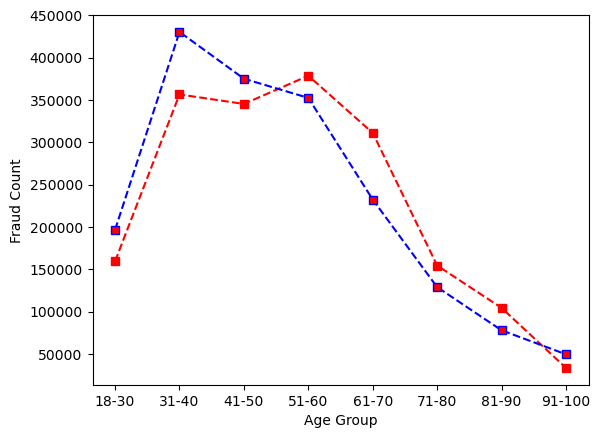

In [48]:
# Lets visualise it with the line plot
fraud_data_oversampled.groupby('age_group').size().plot(
                                              kind='line',
                                              xlabel='Age Group',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='red',
                                              linestyle='--',
                                              markerfacecolor='red')
non_fraud_data_oversampled.groupby('age_group').size().plot(
                                              kind='line',
                                              xlabel='Age Group',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

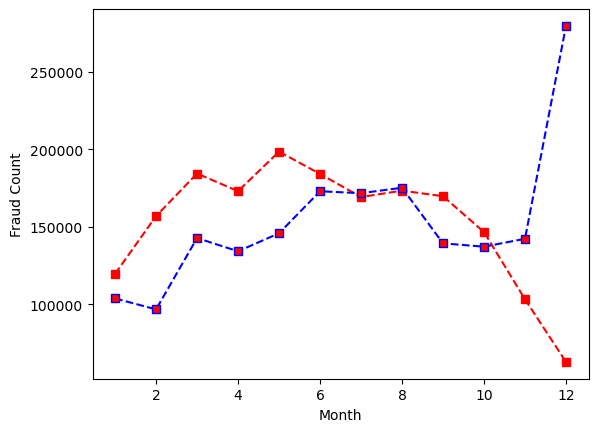

In [49]:
# Lets visualise it with the line plot
fraud_data_oversampled.groupby('month').size().plot(
                                              kind='line',
                                              xlabel='Month',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='red',
                                              linestyle='--',
                                              markerfacecolor='red')
non_fraud_data_oversampled.groupby('month').size().plot(
                                              kind='line',
                                              xlabel='Month',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

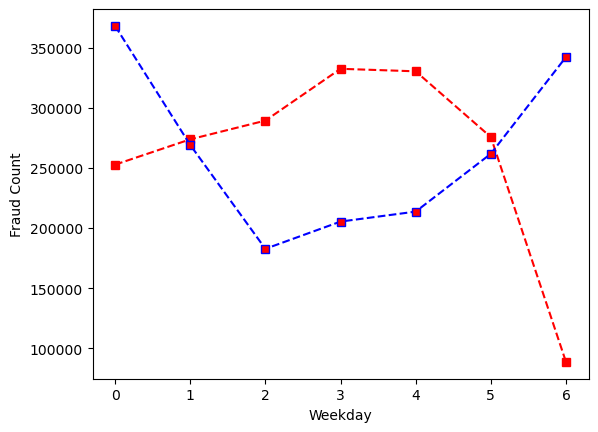

In [50]:
# Lets visualise it with the line plot
fraud_data_oversampled.groupby('weekday').size().plot(
                                              kind='line',
                                              xlabel='Weekday',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='red',
                                              linestyle='--',
                                              markerfacecolor='red')
non_fraud_data_oversampled.groupby('weekday').size().plot(
                                              kind='line',
                                              xlabel='Weekday',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

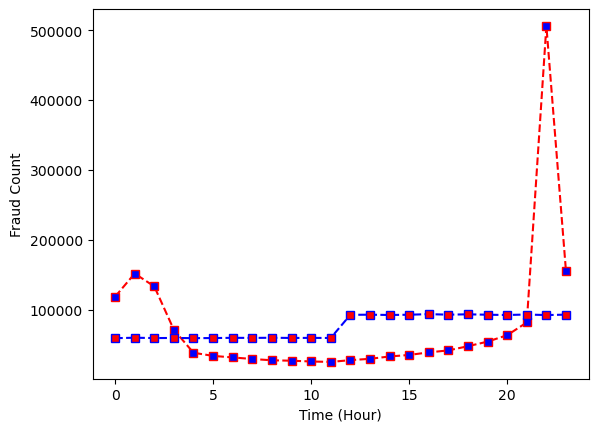

In [51]:
# Lets visualise it with the line plot
fraud_data_oversampled.groupby('hour').size().plot(
                                              kind='line',
                                              xlabel='Time (Hour)',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='red',
                                              linestyle='--',
                                              markerfacecolor='blue')
non_fraud_data_oversampled.groupby('hour').size().plot(
                                              kind='line',
                                              xlabel='Time (Hour)',
                                              ylabel='Fraud Count',
                                              marker='s',
                                              color='blue',
                                              linestyle='--',
                                              markerfacecolor='red')

plt.show()

In [52]:
oversampled_data.drop('age_group', axis=1, inplace=True)

In [53]:
# Performing Stander Scaler

X = oversampled_data.drop('is_fraud', axis=1)
y = oversampled_data.is_fraud

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fraud_data_pp_scaled = pd.DataFrame(X_scaled, columns=X.columns)

fraud_data_pp_scaled.head()


,amt,gender,city_pop,merch_lat,merch_long,age,month,weekday,hour,category_risk
0,-0.784995,1.089780,-0.282488,-0.529890,0.592933,-0.919227,-1.702527,-0.931415,-1.675571,1.182208
1,-0.512042,1.089780,-0.293513,2.150661,-2.112211,-0.338981,-1.702527,-0.931415,-1.675571,1.182208
2,-0.210742,-0.917616,-0.280317,0.925686,-1.660683,0.589411,-1.702527,-0.931415,-1.675571,-0.275287
3,-0.678147,-0.917616,-0.287615,1.717476,-1.691119,0.299289,-1.702527,-0.931415,-1.675571,-0.275287
4,-0.686261,-0.917616,-0.293677,0.013184,0.848629,-0.803177,-1.702527,-0.931415,-1.675571,-0.275287


In [54]:
X = fraud_data_pp_scaled
Y = y



# Splitting the dataset into training and testing set by 8:2 ratio (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# printing training and testing set shapes to verify if the splitting has occurred properly.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2948388, 10)
(737098, 10)
(2948388,)
(737098,)


In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

def model_performance(model_name, model, X_train, y_train, y_test, y_pred):

    print('Model name: %s'%model_name)
    print('Train accuracy: %f'%model.score(X_train, y_train))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    confusion_mtx = confusion_matrix(y_test, y_pred)

    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1-score: ", f1_score(y_test, y_pred))

    print("Confusion matrix:")
    print(confusion_mtx)
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_mtx, annot=True, cmap="Reds", fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()


Model name: Logistic Regression
Train accuracy: 0.851234
Accuracy:  0.8518663732637994
Precision:  0.9286117390802132
Recall:  0.7626717118601802
F1-score:  0.8375011347790047
Confusion matrix:
[[346535  21631]
 [ 87558 281374]]


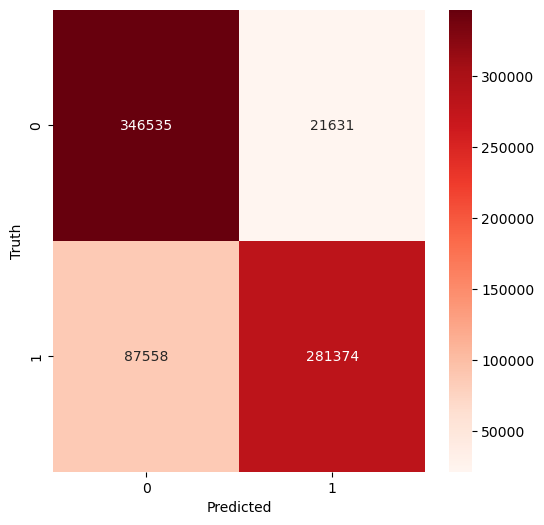

In [65]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

model_performance(model_name="Logistic Regression", model=logistic_regression, X_train=X_train, y_train=y_train, y_test=y_test, y_pred=y_pred)


By Default the Logistic Regression penalty is L2 which is nothing but an Ridge Regularization.

Lets perform the Logistic Regression with Lasso Regularization.

Model name: Logistic Regression with Lasso
Train accuracy: 0.851234
Accuracy:  0.8518623032486861
Precision:  0.9286251782225273
Recall:  0.7626500276473713
F1-score:  0.8374935260535419
Confusion matrix:
[[346540  21626]
 [ 87566 281366]]


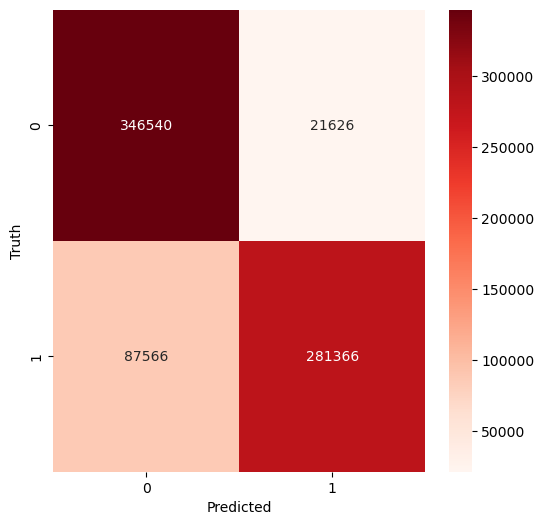

In [69]:
logistic_regression = LogisticRegression(penalty='l1', solver='liblinear')

logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)

model_performance(model_name="Logistic Regression with Lasso", model=logistic_regression, X_train=X_train, y_train=y_train, y_test=y_test, y_pred=y_pred)


In [71]:
logistic_model = LogisticRegression()

logist_params = {
    'C': [0.01, 0.1, 10.0, 50.0, 100.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search cross-validation
grid_search = GridSearchCV(logistic_model, logist_params, cv=5, scoring='f1', verbose=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.837 total time=  13.4s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.836 total time=  13.6s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.836 total time=  14.6s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.837 total time=  14.2s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.837 total time=  14.2s
[CV 1/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.837 total time=  25.5s
[CV 2/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.836 total time=  25.5s
[CV 3/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.836 total time=  25.6s
[CV 4/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.837 total time=  28.5s
[CV 5/5] END ...C=0.01, penalty=l1, solver=saga;, score=0.837 total time=  28.8s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.837 total time=  11.7s
[CV 2/5] END C=0.01, penalty=l2, so

Best parameters: {'C': 50.0, 'penalty': 'l1', 'solver': 'saga'}
Best score: 0.8365975917906926


C:\Users\venka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model name: Logistic Regression with Lasso
Train accuracy: 0.851234
Accuracy:  0.8845499512954859
Precision:  0.9217619752381971
Recall:  0.8406969305996769
F1-score:  0.8793651423694887
Confusion matrix:
[[341840  26326]
 [ 58772 310160]]


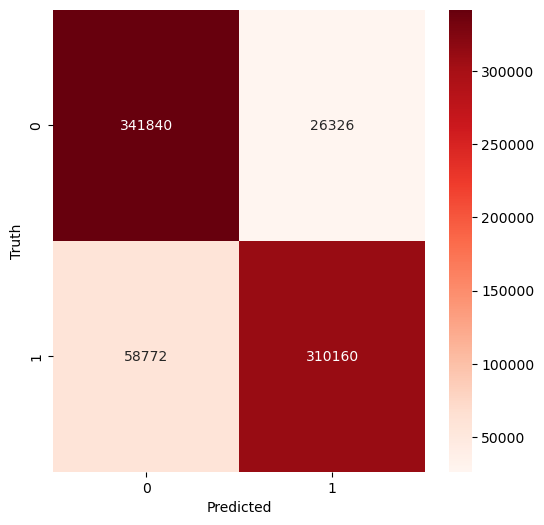

In [76]:
degree = 3

# Create a pipeline with PolynomialFeatures and LogisticRegression
model = make_pipeline(PolynomialFeatures(degree), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

model_performance(model_name="Logistic Regression with Degree polynomial", model=logistic_regression, X_train=X_train, y_train=y_train, y_test=y_test, y_pred=y_pred)


In [ ]:
degree = 4

# Create a pipeline with PolynomialFeatures and LogisticRegression
model = make_pipeline(PolynomialFeatures(degree), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

model_performance(model_name="Logistic Regression with Degree polynomial", model=logistic_regression, X_train=X_train, y_train=y_train, y_test=y_test, y_pred=y_pred)


Model name: Random Forest Classifier
Train accuracy: 1.000000
Accuracy:  0.9972880132628226
Precision:  0.9954978434481063
Recall:  0.9991001051684322
F1-score:  0.9972957214498397
Confusion matrix:
[[366499   1667]
 [   332 368600]]


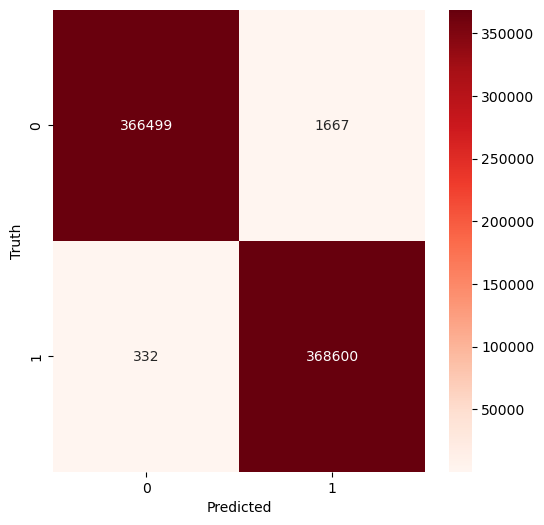

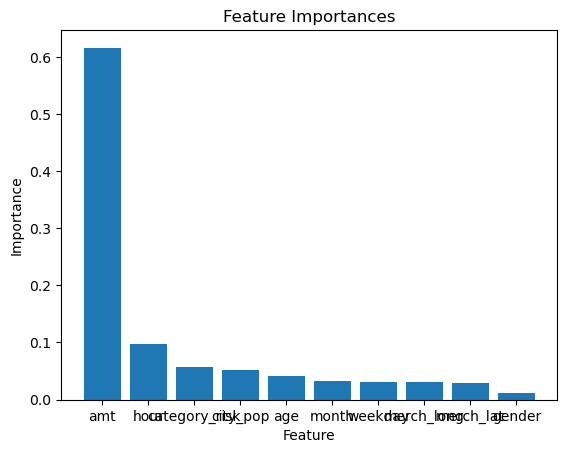

In [65]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
random_forest_classifier.fit(X_train, y_train)

# Testing the model
y_pred_rf = random_forest_classifier.predict(X_test)

# Evaluating the model
model_performance("Random Forest Classifier", random_forest_classifier, X_train, y_train, y_test, y_pred_rf)

# Get the feature importances
rf_feature_importance = random_forest_classifier.feature_importances_

# Create a DataFrame of the feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf_feature_importance})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)



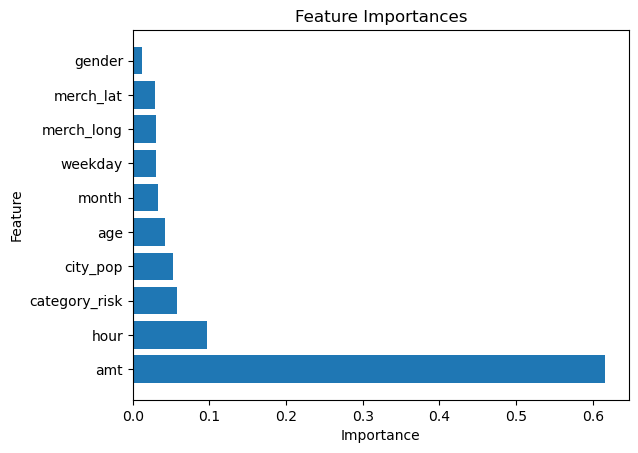

In [67]:
# Plot the feature importances
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()